In [11]:
!pip3 install py-ecg-detectors
#https://github.com/berndporr/py-ecg-detectors/blob/master/usage_example.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import wfdb
from ecgdetectors import Detectors

In [6]:
record_name = "../aura-data/100001/100001_ECG"
record = wfdb.rdrecord(record_name, sampfrom=10000, sampto=20000)

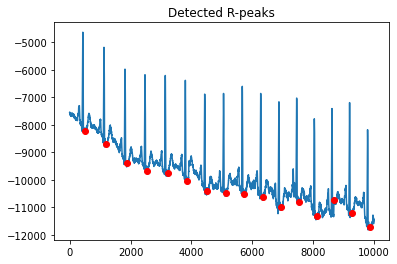

In [10]:
#current_dir = pathlib.Path(__file__).resolve()

#example_dir = current_dir.parent/'example_data'/'ECG.tsv'
#unfiltered_ecg_dat = np.loadtxt(example_dir) 
unfiltered_ecg = record.adc()[:,0]
fs = 1000

detectors = Detectors(fs)

r_peaks = detectors.two_average_detector(unfiltered_ecg)
#r_peaks = detectors.matched_filter_detector(unfiltered_ecg,"templates/template_250hz.csv")
#r_peaks = detectors.swt_detector(unfiltered_ecg)
#r_peaks = detectors.engzee_detector(unfiltered_ecg)
#r_peaks = detectors.christov_detector(unfiltered_ecg)
#r_peaks = detectors.hamilton_detector(unfiltered_ecg)
#r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)


plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title('Detected R-peaks')

plt.show()